Found 2040 files belonging to 30 classes.
Found 240 files belonging to 30 classes.
Found 240 files belonging to 30 classes.
Visualizing Data Augmentation... (A plot should appear)


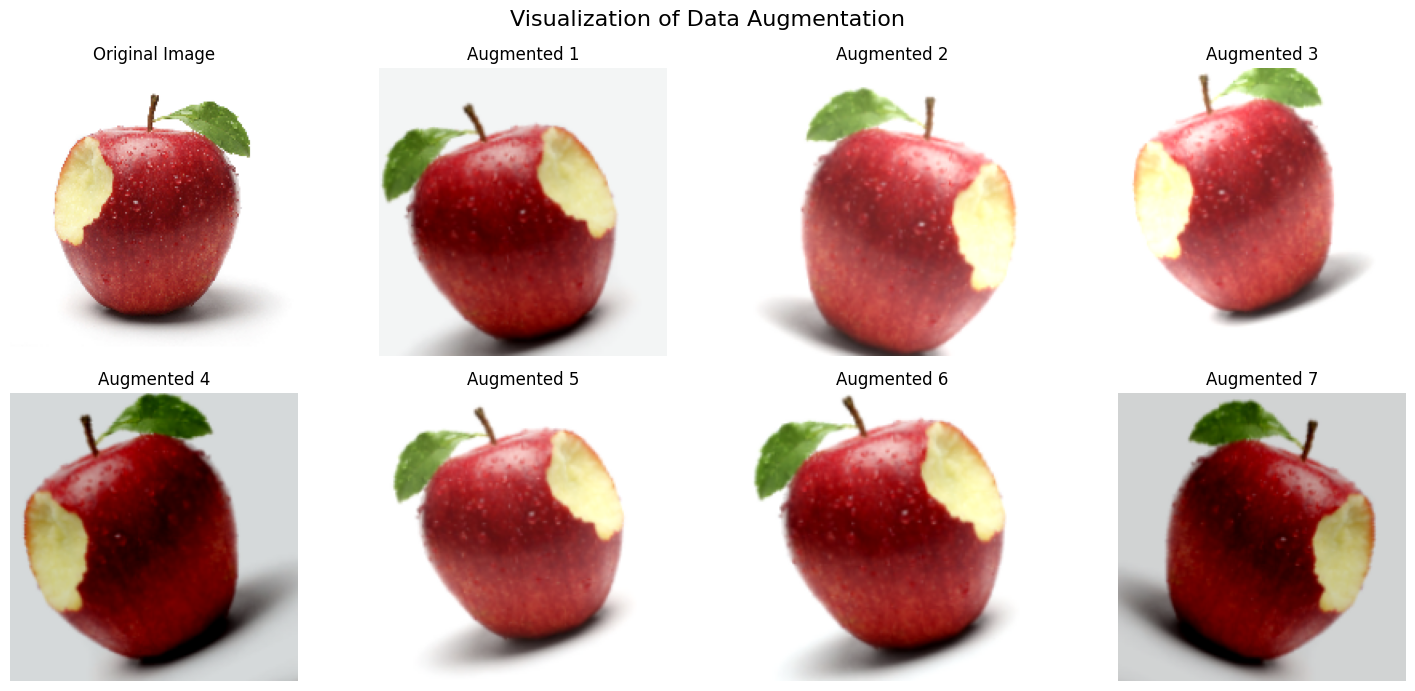

Data augmentation visualization complete.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import  load_img, img_to_array

data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

img_width = 180
img_height = 180

#Define a DATA AUGMENTATION SEQUENTIAL
def augment_data(image, label):
    return data_augmentation(image, training=True), label
data_augmentation = tf.keras.Sequential([
    #layers.Rescaling(1.0 / 255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
    layers.RandomCrop(img_height - 20, img_width - 20),
    layers.Resizing(img_height, img_width),
], name="data_augmentation_pipeline")
AUTOTUNE = tf.data.AUTOTUNE

#Import Data
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)
data_cat = data_train.class_names
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size = (img_width, img_height),
                                                       batch_size = 32,
                                                       shuffle = False,
                                                       validation_split = False)
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = False,
    validation_split = False
)



# Cache
data_train = data_train.map(augment_data, num_parallel_calls=AUTOTUNE)
data_train = data_train.cache().shuffle(1000)
data_train = data_train.prefetch(AUTOTUNE)

data_val = data_val.cache().prefetch(buffer_size=AUTOTUNE)
data_test = data_test.cache().prefetch(buffer_size=AUTOTUNE)

# Visualize Data Augmentation For Demo
print("Visualizing Data Augmentation... (A plot should appear)")
sample_img_path = Path(data_train_path) / "apple" / "Image_1.jpg"

if sample_img_path.exists():
    sample_img = load_img(sample_img_path, target_size=(img_height, img_width))
    sample_array = img_to_array(sample_img)
    sample_array = np.expand_dims(sample_array, 0)

    plt.figure(figsize=(15, 7))
    plt.suptitle("Visualization of Data Augmentation", fontsize=16)

    plt.subplot(2, 4, 1)
    plt.imshow(sample_img)
    plt.title("Original Image")
    plt.axis('off')

    i = 2
    for _ in range(7):
        augmented = data_augmentation(sample_array, training=True)[0]
        plt.subplot(2, 4, i)
        plt.imshow(augmented.numpy().astype("uint8"))
        plt.title(f"Augmented {i-1}")
        plt.axis('off')
        i += 1
        if i > 8:
         break
    plt.tight_layout()
    plt.show()
    print("Data augmentation visualization complete.")
else:
    print(f"Warning: Sample image not found at {sample_img_path}. Skipping augmentation visualization.")


In [113]:
#  Custom CNN_Model_1 Creation

model = Sequential([
    layers.Rescaling(1.0 / 255),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128),
    layers.Dense(len(data_cat)),
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs_size = 15
print("Setting up callbacks (EarlyStopping, ModelCheckpoint)...")


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model_custom_cnn.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

print("--- Starting Model Training ---")
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, batch_size=32, callbacks=[early_stopping, model_checkpoint])
# print("\n--- Model Summary ---")
# model.summary()
# print("---------------------\n")

Setting up callbacks (EarlyStopping, ModelCheckpoint)...
--- Starting Model Training ---
Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.0541 - loss: 3.5882
Epoch 1: val_accuracy improved from None to 0.22792, saving model to best_model_custom_cnn.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.0886 - loss: 3.2626 - val_accuracy: 0.2279 - val_loss: 2.5116
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.2558 - loss: 2.5803
Epoch 2: val_accuracy improved from 0.22792 to 0.38462, saving model to best_model_custom_cnn.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.2738 - loss: 2.5021 - val_accuracy: 0.3846 - val_loss: 2.1537
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3339 - loss: 2.1786
Epoch 3: val_accuracy improved from 0.38462 to 0.45584, saving model to best_model_custom_cnn.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3525 - loss: 2.1549 - val_accuracy: 0.4558 - val_loss: 1.8719
Epoch 4

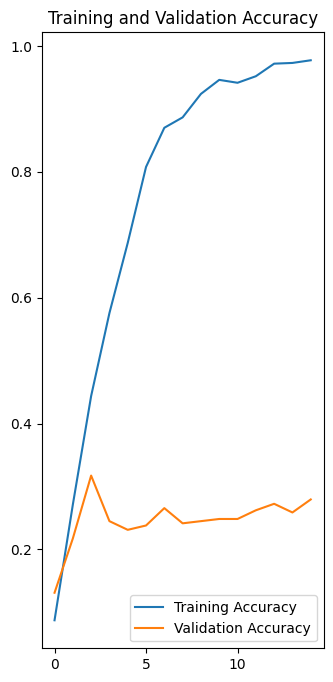

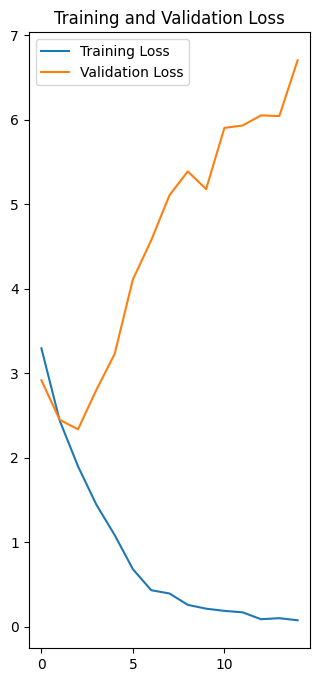

In [83]:
# Evaluation For CNN Model 1
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Custom CNN_Model_2

In [ ]:
# Evaluation For CNN_Model_2

In [17]:
# VGG16 Model
base_model = VGG19(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model_vgg = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(data_cat),activation='softmax')
])

# 5. compile
model_vgg.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Set up callbacks
vgg_early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=5,
                                   verbose=1,
                                   restore_best_weights=True)

vgg_checkpoint = ModelCheckpoint(
    'vgg19_model.keras',  # <-- This is the final file you need
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

epochs_size = 15

# 6. train
history_vgg = model_vgg.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
    batch_size=32,
    callbacks=[vgg_early_stopping, vgg_checkpoint]
)


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0305 - loss: 11.3878
Epoch 1: val_accuracy improved from None to 0.05833, saving model to vgg19_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.0363 - loss: 9.9103 - val_accuracy: 0.0583 - val_loss: 7.8791
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.0914 - loss: 6.7741
Epoch 2: val_accuracy improved from 0.05833 to 0.13333, saving model to vgg19_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.1137 - loss: 6.4158 - val_accuracy: 0.1333 - val_loss: 5.9335
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 902ms/step - accuracy: 0.1785 - loss: 5.0204
Epoch 3: val_accuracy improved from 0.13333 to 0.23750, saving model to vgg19_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.1912 - loss: 4.8861 - val_accuracy: 0.2375 - val_loss: 4.7368
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.2632 - loss: 4.1177
Epoch 4: val_accuracy improved from 0.23750 t

In [ ]:
# Evaluation For VGG16 Model

In [23]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'radish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'tomato',
 'watermelon']

In [22]:

# Final Application
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, axis=0)

cnn_model = tf.keras.models.load_model('best_model_custom_cnn.keras')
vgg_model = tf.keras.models.load_model('vgg19_model.keras')
predict = vgg_model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Veg/Fruit in image is sweetcorn with accuracy of 8.57
